# Einführung Data Science - Praktikum 04 - Chess


## Library imports

In [1]:
import os

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt

## Loading data
**Not so easy this time --> Parsing required!**

The data comes from the Fédération Internationale des Échecs (FIDE, French for International Chess Federation): https://ratings.fide.com/download.phtml

Here we want to work with the dataset “**Standard ratings**.” The homework assignment was to import this data (in the form of an XML file).
This cannot be done directly with Pandas; the data must first be read in and converted into a Python dictionary (or a list). Information about the chess rating, the so-called ELO number: https://de.wikipedia.org/wiki/Elo-Zahl.

When the file is opened in an editor, it looks like this:
```
<playerslist>
<player>
<fideid>25121731</fideid>
<name>A C J John</name>
<country>IND</country>
<sex>M</sex>
<title></title>
<w_title></w_title>
<o_title></o_title>
<foa_title></foa_title>
<rating>1063</rating>
<games>0</games>
<k>40</k>
<birthday>1987</birthday>
<flag>i</flag>
</player>
<player>
<fideid>35077023</fideid>
…
```

## Writing parsers
There are several ways to write a “parser” to read the files.

XML files can also be imported in different ways. You can either (1) write a completely independent parser that reads and interprets the file line by line. However, this is quite time-consuming. Using existing Python libraries, such as `xml` or `xmltodict` is often easier.

Other sources:

- https://www.geeksforgeeks.org/xml-parsing-python/
- https://www.w3schools.com/xml/xml_parser.asp
- https://www.delftstack.com/de/howto/python/python-xml-parser/


## Option using `xmltodict`

In [2]:
import xmltodict

# when in the subfolder datasets
cwd = os.getcwd()
dataset_path = ""
file_xml = r"C:\Users\Sander\Repos\DataScience\standard_rating_list.xml"

file_path = os.path.join(cwd, dataset_path, file_xml)
with open(file_path) as file:
    doc = xmltodict.parse(file.read())

### Convert to Pandas DataFrame
xmltodoc converts the content into a nested dictionary.

In [3]:
type(doc["playerslist"]["player"])

list

In [4]:
doc["playerslist"]["player"][:2]

[{'fideid': '25121731',
  'name': 'A C J John',
  'country': 'IND',
  'sex': 'M',
  'title': None,
  'w_title': None,
  'o_title': None,
  'foa_title': None,
  'rating': '1063',
  'games': '0',
  'k': '40',
  'birthday': '1987',
  'flag': 'i'},
 {'fideid': '35077023',
  'name': 'A Chakravarthy',
  'country': 'IND',
  'sex': 'M',
  'title': None,
  'w_title': None,
  'o_title': None,
  'foa_title': None,
  'rating': '1151',
  'games': '0',
  'k': '40',
  'birthday': '1986',
  'flag': 'i'}]

In [5]:
data = pd.DataFrame(doc["playerslist"]["player"])

# (1) Exercise: Initial data exploration!
Use Pandas to answer the following questions:

- How many columns are there and what are they? --> `data.columns`
- Are there any missing values? --> `.info()`
- Initial overview and: Are there any unusual entries? --> `.describe()`


In [6]:
data.columns

Index(['fideid', 'name', 'country', 'sex', 'title', 'w_title', 'o_title',
       'foa_title', 'rating', 'games', 'k', 'birthday', 'flag'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413948 entries, 0 to 413947
Data columns (total 13 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   fideid     413948 non-null  object
 1   name       413948 non-null  object
 2   country    413948 non-null  object
 3   sex        413948 non-null  object
 4   title      20539 non-null   object
 5   w_title    4071 non-null    object
 6   o_title    1582 non-null    object
 7   foa_title  2709 non-null    object
 8   rating     413948 non-null  object
 9   games      413948 non-null  object
 10  k          413948 non-null  object
 11  birthday   405475 non-null  object
 12  flag       269155 non-null  object
dtypes: object(13)
memory usage: 41.1+ MB


In [8]:
data.describe()

,fideid,name,country,sex,title,w_title,o_title,foa_title,rating,games,k,birthday,flag
count,413948,413948,413948,413948,20539,4071,1582,2709,413948,413948,413948,405475,269155
unique,413948,407224,199,2,9,5,33,4,1707,31,4,100,3
top,25121731,"Mueller, Michael",RUS,M,FM,WFM,FI,AFM,1695,0,40,2005,i
freq,1,10,38650,369678,8707,1876,426,932,447,352437,230319,13034,224885


# (2) Data cleaning

The data can now be simplified somewhat for our purposes by retaining only the features/variables that are relevant to us.

Clean the DataFrame by retaining only the columns “name,” “country,” “sex,” “rating,” and “birthday.”

In [9]:
keep_columns = ["name", "country", "sex", "rating", "birthday"]
data = data[keep_columns]

Remove entries with missing values (using `.dropna()`)

In [10]:
data = data.dropna()

In [11]:
data.head()

,name,country,sex,rating,birthday
0,A C J John,IND,M,1063,1987
1,A Chakravarthy,IND,M,1151,1986
2,"A E M, Doshtagir",BAN,M,1840,1974
3,"A hamed Ashraf, Abdallah",EGY,M,1728,2001
4,"A Hamid, Harman",MAS,M,1325,1970


Where necessary convert strings to numbers, e.g., using `data.xyz = data.xyz.astype(int)`.

In [12]:
data.rating = data.rating.astype(int)
data.birthday = data.birthday.astype(int)

Review the cleaned data again with `.head()`, `.info()`, and `.describe()`. **TIP**: To display all columns, it is best to execute `.describe(include=“all”)`!

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 405475 entries, 0 to 413947
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   name      405475 non-null  object
 1   country   405475 non-null  object
 2   sex       405475 non-null  object
 3   rating    405475 non-null  int64 
 4   birthday  405475 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 18.6+ MB


In [14]:
data.describe(include='all')

,name,country,sex,rating,birthday
count,405475,405475,405475,405475.000000,405475.000000
unique,398887,198,2,NaN,NaN
top,"Mueller, Michael",RUS,M,NaN,NaN
freq,10,38052,361832,NaN,NaN
mean,NaN,NaN,NaN,1618.937811,1984.557615
std,NaN,NaN,NaN,347.265922,20.228182
min,NaN,NaN,NaN,1001.000000,1900.000000
25%,NaN,NaN,NaN,1333.000000,1969.000000
50%,NaN,NaN,NaN,1611.000000,1989.000000
75%,NaN,NaN,NaN,1885.000000,2002.000000


In [15]:
# your code here

How many different countries are included in the data set?

In [16]:
data.country.value_counts()

country
RUS    38052
IND    36745
ESP    29243
GER    29151
FRA    27903
       ...  
CAF        5
VIN        4
CHA        3
COM        1
SKN        1
Name: count, Length: 198, dtype: int64

What is the range of values for `rating`?

In [17]:
data.rating.max()-data.rating.min()

1852

How old is the oldest player?

In [18]:
data.describe(include='all')

,name,country,sex,rating,birthday
count,405475,405475,405475,405475.000000,405475.000000
unique,398887,198,2,NaN,NaN
top,"Mueller, Michael",RUS,M,NaN,NaN
freq,10,38052,361832,NaN,NaN
mean,NaN,NaN,NaN,1618.937811,1984.557615
std,NaN,NaN,NaN,347.265922,20.228182
min,NaN,NaN,NaN,1001.000000,1900.000000
25%,NaN,NaN,NaN,1333.000000,1969.000000
50%,NaN,NaN,NaN,1611.000000,1989.000000
75%,NaN,NaN,NaN,1885.000000,2002.000000


How old is the youngest player?

In [19]:
# your code here

---
# (3) Analyses


## Pandas review:

### Viewing categorical variables
With Pandas, we can quickly and easily see which categories occur how often using `.value_counts(“here_name_of_column”)`.

### Graphical representation:
With Pandas, we can often display results graphically very quickly, e.g. using `.plot(kind=“hist”)`. Here, we can choose from many types, such as `hist`, `pie`, `scatter`, `bar`, `barh`.

### Sorting
To sort the table by values, we use `.sort_values(“name_of_the_column”)`. This sorts the table according to the desired column, but in ascending order. For reverse sorting, we use `.sort_values(“name_of_the_column”, ascending=False)`.

### Selecting data using a mask:
We can select part of the data with a mask, according to the pattern

```python
mask = (data[column_name_here] == ... ) # <, >, ==, >=,...
data[mask]
```

Multiple masks can be applied, for example

```python
mask1 = (data[column_name_here] == ... ) # <, >, ==, >=,...
mask2 = (data[column_name_here] > ... ) 
data[mask1 & mask2]
```

## (3.1) Analyzing gender gap and best players

How many male and female players are included in the data set?

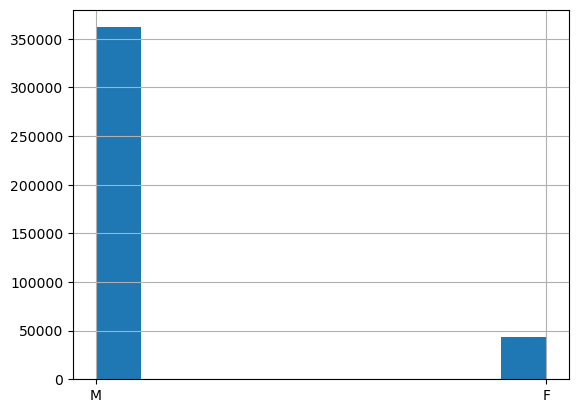

In [31]:
female_mask = (data['sex'] == 'F')
data.sex.hist()
data[female_mask].value_counts('sex')
f_vs_m = data.value_counts('sex')

---
What is the percentage distribution (male vs. female)?

In [32]:
f_vs_m = f_vs_m
ratio = f_vs_m.F/f_vs_m.sum()
f"Anteil Frauen: {(ratio*100):.2f} %."

'Anteil Frauen: 10.76 %.'

---
Create a pie plot for this distribution.

<Axes: ylabel='count'>

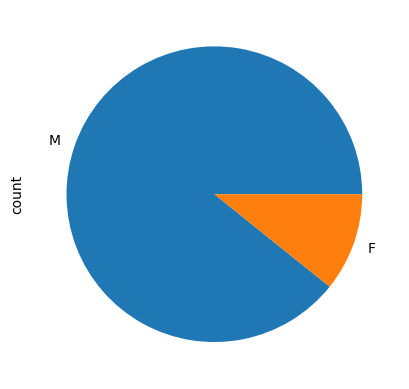

In [23]:
f_vs_m.plot.pie()

---
How are the birth years distributed among men and women? Are there significant differences or not?

Create a histogram for women and one for men.

<Axes: ylabel='Frequency'>

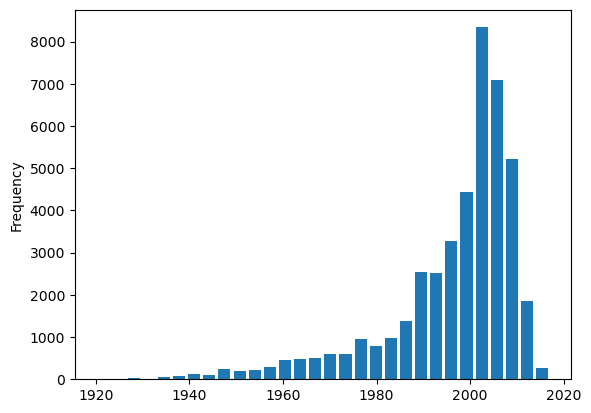

In [24]:
mask_f = 0# your code here
data[female_mask]["birthday"].plot(kind="hist", bins=30, rwidth=0.8)

<Axes: ylabel='Frequency'>

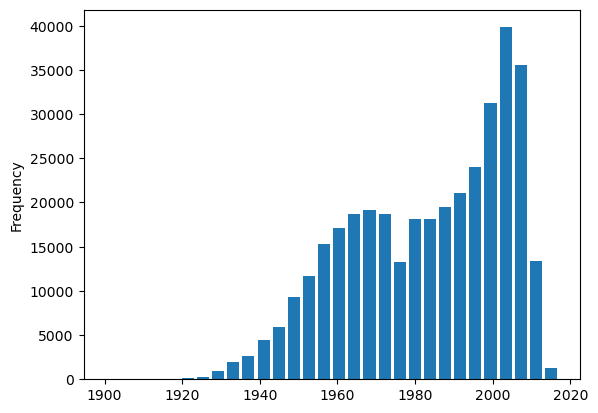

In [25]:
mask_m = (data['sex'] == 'M')
data[mask_m]["birthday"].plot(kind="hist", bins=30, rwidth=0.8)

Improve comparability: Standardize to value 1 and overlap with transparency.

Text(0, 0.5, 'Proportion')

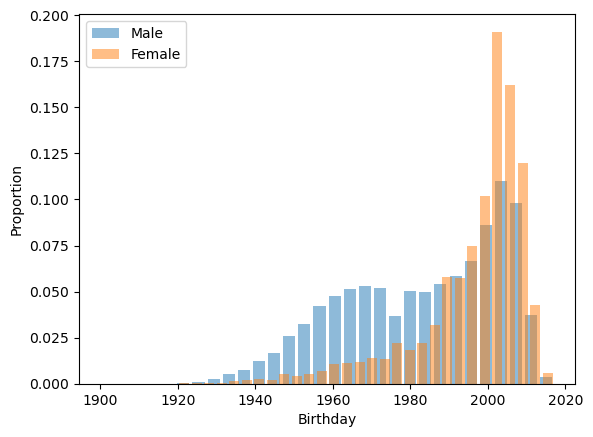

In [26]:
# Create masks for each gender
mask_f = female_mask
mask_m = mask_m

# Calculate weights for each gender
male_weights = np.ones_like(data[mask_m]['birthday']) / len(data[mask_m]['birthday'])
female_weights = np.ones_like(data[mask_f]['birthday']) / len(data[mask_f]['birthday'])

# Plot the histograms
ax = data[mask_m]['birthday'].plot(kind='hist', bins=30, rwidth=0.8, alpha=0.5, label='Male', weights=male_weights)
data[mask_f]['birthday'].plot(kind='hist', bins=30, rwidth=0.8, alpha=0.5, label='Female', ax=ax, weights=female_weights)

# Customize the plot
ax.legend()
ax.set_xlabel('Birthday')
ax.set_ylabel('Proportion')

Take another look at the percentage distribution of female vs. male. This time, however, only for people born after 1999.

In [30]:
f_vs_m

0

In [35]:
mask_birthday_2000 = (data.birthday > 1999)
f_vs_m = data[mask_birthday_2000].value_counts('sex')

ratio = f_vs_m.F/f_vs_m.sum()
f"Anteil Frauen: {(ratio*100):.2f} %."

'Anteil Frauen: 18.60 %.'

Who are the 10, 20, 50, or 100 best players?

In [42]:
data_rating_sored = data[['name','sex','rating']].sort_values('rating',ascending=False)

In [45]:
top_100 = data_rating_sored.head(100)

What is the male-to-female ratio in the top 100?

In [47]:
f_vs_m = top_100.value_counts('sex')# your code here
ratio = f_vs_m.F/f_vs_m.sum()
f"Anteil Frauen: {(ratio*100):.2f} %."

'Anteil Frauen: 1.00 %.'

## (3.2) Analyzing ELO distributions

- Repeat the task, but this time add another selection filter to restrict the birth years. Try, for example, `< 2002` or `< 1992`.

Display the distributions of the ELO ratings for three cases: (1) All players, (2) male players, (3) female players.

(1) All players

array([[<Axes: title={'center': 'rating'}>]], dtype=object)

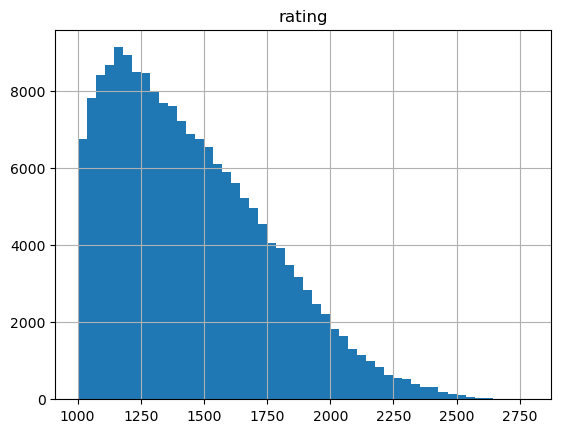

In [51]:
bd_mask = (data.birthday > 1992)
data[bd_mask].hist('rating',bins=50)

(2) male and (3) female players.

<Axes: ylabel='Frequency'>

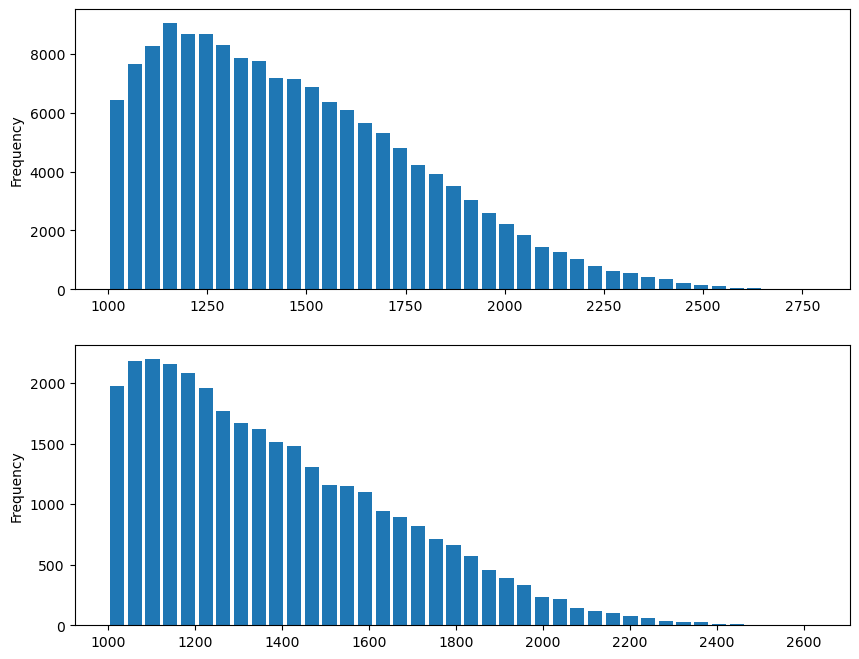

In [52]:
mask_f = (data['sex'] == 'F')# your code her
mask_m = (data['sex'] == 'M')# your code here
mask_birthday = (data.birthday > 1992)# your code here

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,8))
data[mask_m & mask_birthday]["rating"].plot(kind="hist", bins=40, rwidth=0.8,
                                    ax=ax1)
data[mask_f & mask_birthday]["rating"].plot(kind="hist", bins=40, rwidth=0.8,
                                    ax=ax2)

Normalize again and overlap:

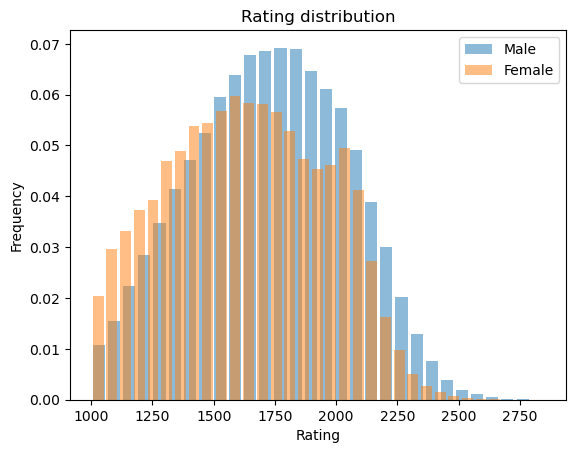

In [53]:
mask_birthday = data["birthday"] < 2002
data_m = data[mask_m & mask_birthday]
data_f = data[mask_f & mask_birthday]


bins = 30

weights_m = np.ones_like(data_m["rating"]) / len(data_m)
weights_f = np.ones_like(data_f["rating"]) / len(data_f)

plt.hist(data_m["rating"], bins=bins, rwidth=0.8, alpha=0.5, label='Male', weights=weights_m)
plt.hist(data_f["rating"], bins=bins, rwidth=0.8, alpha=0.5, label='Female', weights=weights_f)

plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Rating distribution')
plt.legend(loc='upper right')

## Which country to examine?
We can see which countries have many female players registered by prefiltering the data (only women) and then counting the countries with `.value_counts(“country”)`. For an overview, we then look at the first five countries with the highest number of female players.

In [55]:
mask_f = (data.sex == 'F')
data_female_per_country = data[mask_f].value_counts('country')# your code here
data_female_per_country= data_female_per_country.sort_values(ascending=False)
data_female_per_country = data_female_per_country.head()

country
RUS    6376
IND    4147
FRA    2424
GER    2011
POL    1769
Name: count, dtype: int64

For a better picture, see also for men.

In [ ]:
mask_m = # your code here
data_male_per_country = # your code here
# sort
# your code here

Now let's look at countries with a representative number of women. We filter further and look at which countries have at least 500 female players registered.

In [ ]:
mask_f_count_500 = # your code here
# output filtered data
# your code here

However, it is not only a minimum number that is decisive. We are also looking for as balanced a ratio of women to men as possible. We create a list of all countries by outputting the index from `data_female_per_country`:

In [ ]:
countries_with_500_females = data_female_per_country[mask_f_count_500].index
countries_with_500_females

Instead of using a mask, we can also use the `.isin()` method, to which we can pass our country list `countries_with_500_females`. We can now apply this to `data_male`.

In [ ]:
data_male = data[mask_m]

mask_filtered_data_m = # your code here
filtered_data_m = # your code here
data_male_per_country = # your code here

In [ ]:
print(data_male_per_country)

In [ ]:
print(data_female_per_country)

If you want to read the index and values from a Pandas `Series` object, you can use the `.iteritems()` method. For demonstration purposes, we use this in a for loop to better illustrate (in the console) the data filtered so far. Sprucing things up with f-strings and a “homemade” table:

In [ ]:
print(f"{'Country':^10}|{'Male':^10}|{'Female':^10}")
print("-" * 32)

for idx, value in data_male_per_country.items():
    female_value = data_female_per_country.loc[idx]
    print(f"{idx:^10}|{value:^10}|{female_value:^10}")

Now we calculate the percentage of women per country.

In [ ]:
ratios = # your code here
print(ratios.sort_values(ascending=False))

We add the ratios from the table.

In [ ]:
print(f"{'Country':^10}|{'Male':^10}|{'Female':^10}|{'Ratio':^10}")
print("-" * 43)

for idx, value in data_male_per_country.items():
    female_value = data_female_per_country.loc[idx]
    ratio = f"{ratios.loc[idx] * 100:.2f} %"
    print(f"{idx:^10}|{value:^10}|{female_value:^10}|{ratio:^10}")

Let's look at ELO rating distributions for women in countries that are potentially “good to study” according to the criteria “as many people as possible and as balanced a ratio as possible.”

To do this, we will again look at two overlapping bar plots with normalized ELO ratings.

In [ ]:
mask_birthday = # your code here
mask_country = # your code here
data_m = # your code here
data_f = # your code here

weights_m = np.ones_like(data_m["rating"]) / len(data_m)
weights_f = np.ones_like(data_f["rating"]) / len(data_f)

bins = 30

data_m["rating"].plot(kind="hist", bins=bins, rwidth=0.8, alpha=0.5, label='Male', weights=weights_m, legend=True)
data_f["rating"].plot(kind="hist", bins=bins, rwidth=0.8, alpha=0.5, label='Female', weights=weights_f, legend=True)

plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Rating distribution')
plt.legend(loc='upper right')

### EXAMPLE - Alternative plot option for men/women from India (born before 2002)

In [ ]:
mask_year = data["birthday"] < 2002
mask_country = data["country"] == "IND"


a, b = np.histogram(data[mask_f & mask_year & mask_country]["rating"], bins= 50)
c, d = np.histogram(data[mask_m & mask_year & mask_country]["rating"], bins= 50)

fig, ax = plt.subplots(figsize=(10, 6))
delta_bin_F = b[1] - b[0]
delta_bin_M = d[1] - d[0]

ax.plot(b[1:] - delta_bin_F/2, a/np.sum(a), ".--", label="Women")
ax.plot(d[1:] - delta_bin_M/2, c/np.sum(c), ".--", label="Men")

ax.set_xlabel("ELO rating")
ax.set_ylabel("Fraction")
plt.legend()
plt.title("Compare chess players form India, born before 2000")